028 train/028/8.jpg


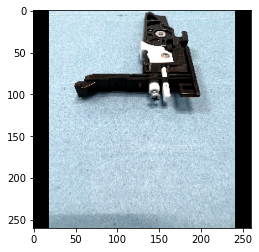

028 train/028/9.jpg


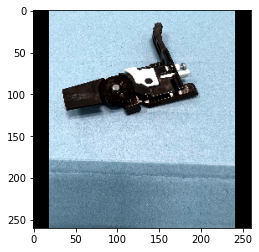

028 train/028/4.jpg


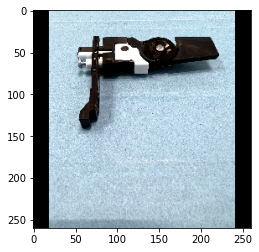

028 train/028/5.jpg


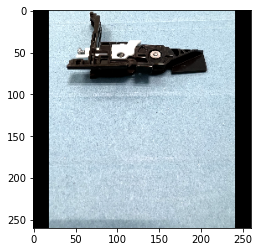

028 train/028/7.jpg


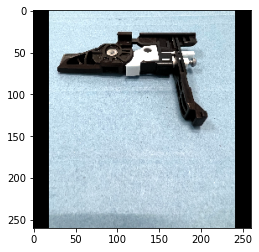

028 train/028/6.jpg


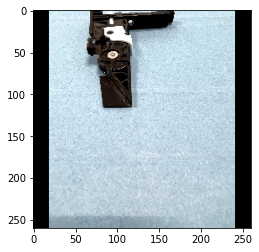

028 train/028/2.jpg


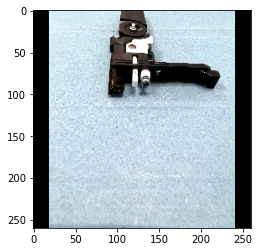

028 train/028/3.jpg


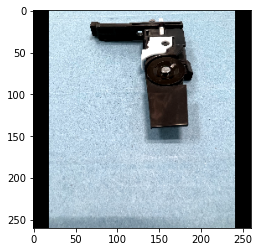

028 train/028/1.jpg


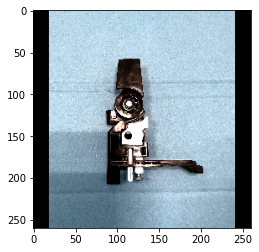

028 train/028/0.jpg


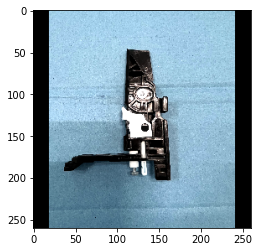

042 train/042/4.jpg


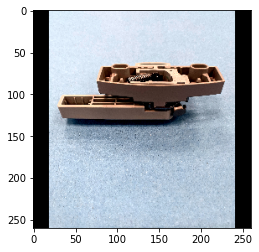

042 train/042/5.jpg


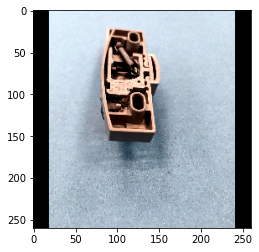

042 train/042/7.jpg


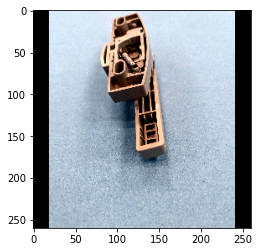

042 train/042/6.jpg


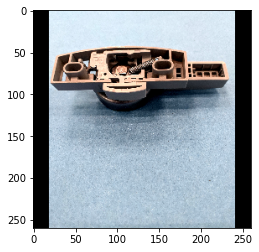

042 train/042/2.jpg


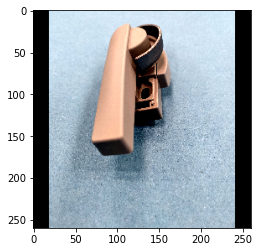

042 train/042/3.jpg


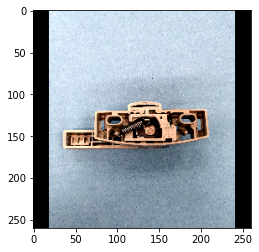

042 train/042/1.jpg


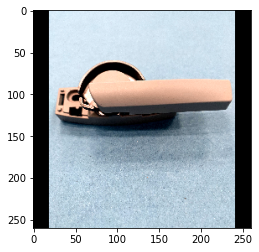

042 train/042/0.jpg


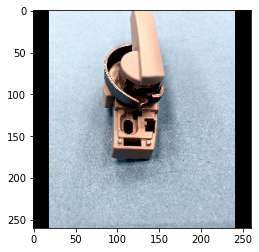

070 train/070/4.jpg


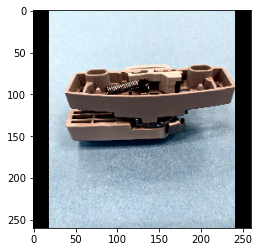

070 train/070/5.jpg


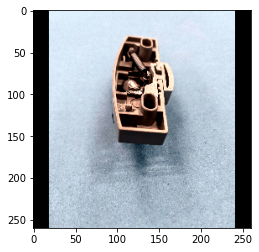

070 train/070/7.jpg


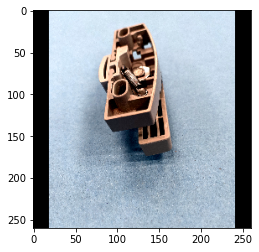

070 train/070/6.jpg


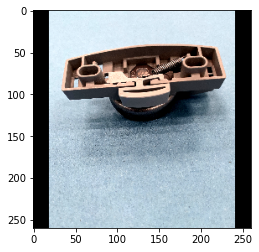

070 train/070/2.jpg


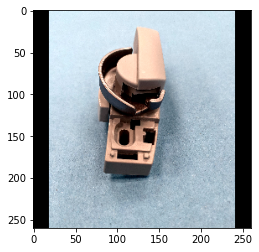

070 train/070/3.jpg


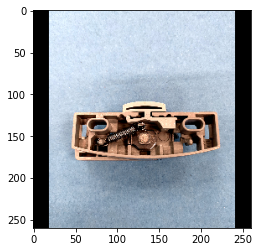

070 train/070/1.jpg


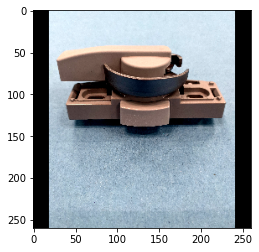

070 train/070/0.jpg


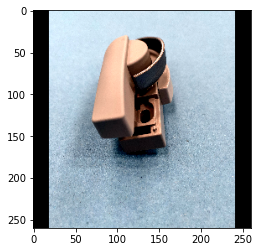

103 train/103/8.jpg


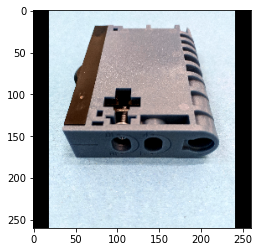

103 train/103/4.jpg


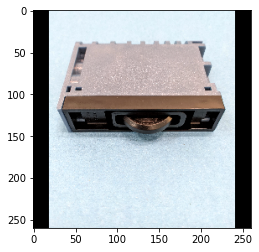

103 train/103/5.jpg


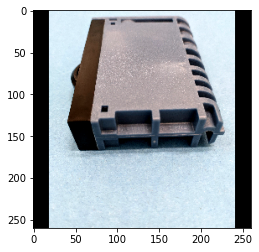

103 train/103/7.jpg


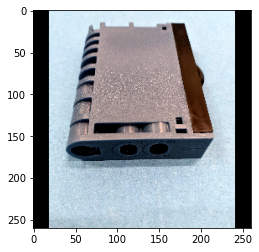

103 train/103/6.jpg


103 train/103/2.jpg


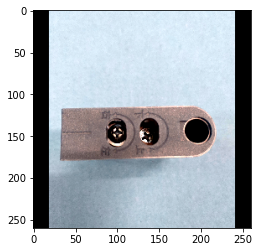

103 train/103/3.jpg


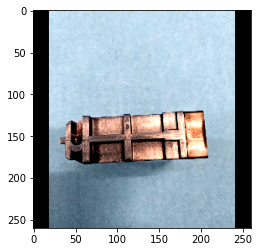

103 train/103/1.jpg


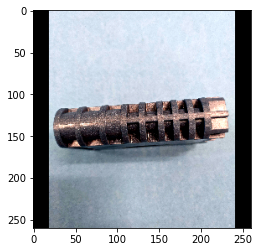

103 train/103/0.jpg


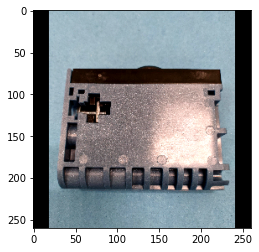

120 train/120/4.jpg


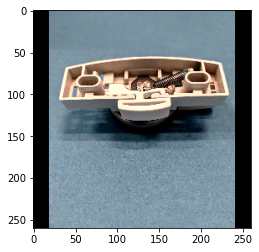

120 train/120/5.jpg


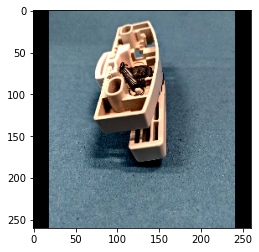

120 train/120/7.jpg


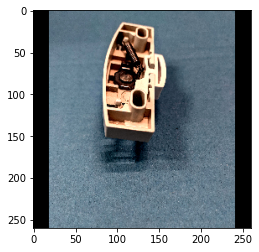

120 train/120/6.jpg


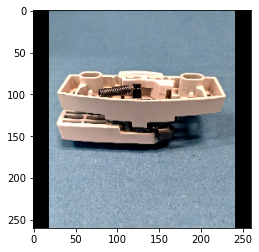

120 train/120/2.jpg


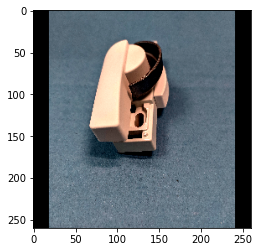

120 train/120/3.jpg


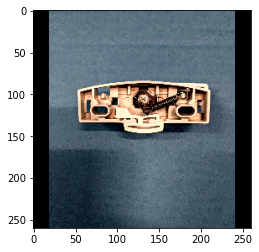

120 train/120/1.jpg


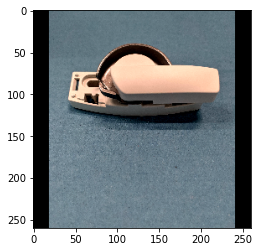

120 train/120/0.jpg


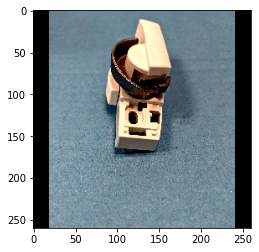

In [5]:
import cv2, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json 
import pprint
import glob
from parts import crop_resize, load_json
from skimage import exposure

def stretching(image):
    p2, p98 = np.percentile(image, (2, 98))
    for j in range(3):
        image[:, :, j] = exposure.rescale_intensity(image[:, :, j], in_range=(p2, p98))
    return image 
import numpy as np
# https://github.com/yu4u/cutout-random-erasing
# datagen = ImageDataGenerator( preprocessing_function=get_random_eraser(v_l=0, v_h=1))  # added



def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser
gs = get_random_eraser(v_l=0, v_h=1)
G = []
path='train/'
for i in range(121+1):
    if i < 10:
        i = "00"+str(i)
    elif i<100 and i>9:
        i = "0"+str(i)
    elif i>99:
        i = str(i)
    if int(i) in [28, 42, 70, 103, 120]:
        imglist = glob.glob(path + i + "/*.jpg")
        for idx, img_ in enumerate(imglist):
            print(i, img_)
            img = cv2.imread(img_)
            #img = gs(img)
            imgs = stretching(img)
            imgs = crop_resize(imgs, n=8, resize=260)
            plt.imshow(imgs, "gray"),plt.show()
            G.append(imgs)   

In [7]:
imgs_ = gs(np.array(G))

UnboundLocalError: local variable 'img_h' referenced before assignment

0 0 (260, 260, 3) 255 0


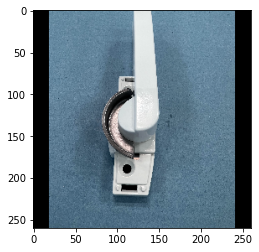

1 0 (260, 260, 3) 255 0


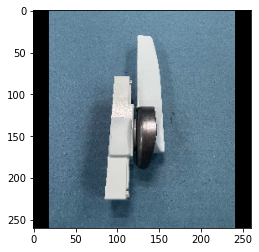

2 0 (260, 260, 3) 255 0


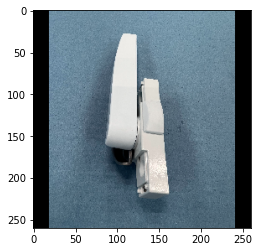

3 0 (260, 260, 3) 255 0


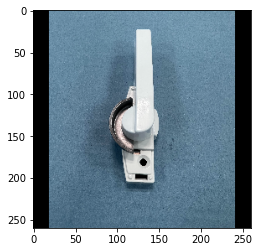

4 0 (260, 260, 3) 255 0


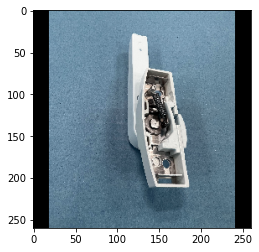

5 0 (260, 260, 3) 255 0


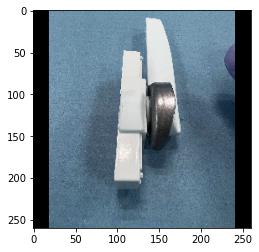

6 0 (260, 260, 3) 255 0


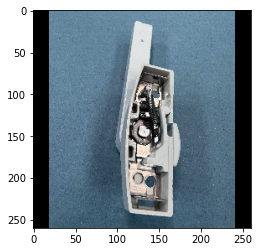

7 0 (260, 260, 3) 255 0


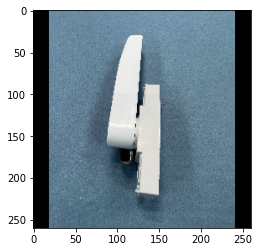

8 0 (260, 260, 3) 255 0


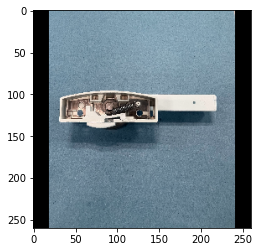

9 0 (260, 260, 3) 255 0
10 0 (260, 260, 3) 255 0
11 0 (260, 260, 3) 255 0
12 0 (260, 260, 3) 255 0
13 1 (260, 260, 3) 255 0
14 1 (260, 260, 3) 255 0
15 1 (260, 260, 3) 255 0
16 1 (260, 260, 3) 255 0
17 1 (260, 260, 3) 255 0
18 1 (260, 260, 3) 255 0
19 1 (260, 260, 3) 255 0
20 1 (260, 260, 3) 255 0
21 2 (260, 260, 3) 255 0
22 2 (260, 260, 3) 255 0
23 2 (260, 260, 3) 255 0
24 2 (260, 260, 3) 255 0
25 2 (260, 260, 3) 255 0
26 2 (260, 260, 3) 255 0
27 2 (260, 260, 3) 255 0
28 2 (260, 260, 3) 246 0
29 3 (260, 260, 3) 255 0
30 3 (260, 260, 3) 255 0
31 3 (260, 260, 3) 255 0
32 3 (260, 260, 3) 255 0
33 3 (260, 260, 3) 255 0
34 3 (260, 260, 3) 255 0
35 3 (260, 260, 3) 255 0
36 3 (260, 260, 3) 255 0
37 4 (260, 260, 3) 255 0
38 4 (260, 260, 3) 255 0
39 4 (260, 260, 3) 255 0
40 4 (260, 260, 3) 255 0
41 4 (260, 260, 3) 255 0
42 4 (260, 260, 3) 255 0
43 4 (260, 260, 3) 255 0
44 5 (260, 260, 3) 255 0
45 5 (260, 260, 3) 255 0
46 5 (260, 260, 3) 255 0
47 5 (260, 260, 3) 255 0
48 5 (260, 260, 3) 255 0
4

320 37 (260, 260, 3) 255 0
321 37 (260, 260, 3) 255 0
322 37 (260, 260, 3) 255 0
323 37 (260, 260, 3) 255 0
324 37 (260, 260, 3) 255 0
325 37 (260, 260, 3) 255 0
326 37 (260, 260, 3) 255 0
327 37 (260, 260, 3) 255 0
328 37 (260, 260, 3) 255 0
329 38 (260, 260, 3) 255 0
330 38 (260, 260, 3) 255 0
331 38 (260, 260, 3) 255 0
332 38 (260, 260, 3) 255 0
333 38 (260, 260, 3) 255 0
334 38 (260, 260, 3) 255 0
335 38 (260, 260, 3) 255 0
336 38 (260, 260, 3) 255 0
337 38 (260, 260, 3) 255 0
338 38 (260, 260, 3) 255 0
339 38 (260, 260, 3) 255 0
340 38 (260, 260, 3) 255 0
341 38 (260, 260, 3) 255 0
342 38 (260, 260, 3) 255 0
343 38 (260, 260, 3) 255 0
344 38 (260, 260, 3) 255 0
345 38 (260, 260, 3) 255 0
346 38 (260, 260, 3) 255 0
347 38 (260, 260, 3) 255 0
348 38 (260, 260, 3) 255 0
349 39 (260, 260, 3) 255 0
350 39 (260, 260, 3) 255 0
351 39 (260, 260, 3) 255 0
352 39 (260, 260, 3) 255 0
353 39 (260, 260, 3) 255 0
354 39 (260, 260, 3) 255 0
355 39 (260, 260, 3) 255 0
356 39 (260, 260, 3) 255 0
3

624 69 (260, 260, 3) 255 0
625 69 (260, 260, 3) 255 0
626 70 (260, 260, 3) 255 0
627 70 (260, 260, 3) 255 0
628 70 (260, 260, 3) 255 0
629 70 (260, 260, 3) 255 0
630 70 (260, 260, 3) 255 0
631 70 (260, 260, 3) 255 0
632 70 (260, 260, 3) 255 0
633 70 (260, 260, 3) 255 0
634 71 (260, 260, 3) 255 0
635 71 (260, 260, 3) 255 0
636 71 (260, 260, 3) 255 0
637 71 (260, 260, 3) 255 0
638 71 (260, 260, 3) 255 0
639 71 (260, 260, 3) 255 0
640 71 (260, 260, 3) 255 0
641 72 (260, 260, 3) 255 0
642 72 (260, 260, 3) 255 0
643 72 (260, 260, 3) 255 0
644 72 (260, 260, 3) 255 0
645 72 (260, 260, 3) 255 0
646 72 (260, 260, 3) 255 0
647 72 (260, 260, 3) 255 0
648 72 (260, 260, 3) 255 0
649 73 (260, 260, 3) 255 0
650 73 (260, 260, 3) 255 0
651 73 (260, 260, 3) 255 0
652 73 (260, 260, 3) 255 0
653 73 (260, 260, 3) 255 0
654 73 (260, 260, 3) 255 0
655 73 (260, 260, 3) 255 0
656 74 (260, 260, 3) 255 0
657 74 (260, 260, 3) 255 0
658 74 (260, 260, 3) 255 0
659 74 (260, 260, 3) 255 0
660 74 (260, 260, 3) 255 0
6

927 101 (260, 260, 3) 255 0
928 102 (260, 260, 3) 255 0
929 102 (260, 260, 3) 255 0
930 102 (260, 260, 3) 255 0
931 102 (260, 260, 3) 255 0
932 102 (260, 260, 3) 255 0
933 102 (260, 260, 3) 255 0
934 102 (260, 260, 3) 255 0
935 103 (260, 260, 3) 254 0
936 103 (260, 260, 3) 255 0
937 103 (260, 260, 3) 252 0
938 103 (260, 260, 3) 254 0
939 103 (260, 260, 3) 255 0
940 103 (260, 260, 3) 255 0
941 103 (260, 260, 3) 255 0
942 103 (260, 260, 3) 255 0
943 103 (260, 260, 3) 255 0
944 104 (260, 260, 3) 255 0
945 104 (260, 260, 3) 255 0
946 104 (260, 260, 3) 255 0
947 104 (260, 260, 3) 255 0
948 104 (260, 260, 3) 255 0
949 104 (260, 260, 3) 255 0
950 104 (260, 260, 3) 255 0
951 104 (260, 260, 3) 255 0
952 104 (260, 260, 3) 255 0
953 104 (260, 260, 3) 255 0
954 104 (260, 260, 3) 255 0
955 104 (260, 260, 3) 255 0
956 104 (260, 260, 3) 255 0
957 104 (260, 260, 3) 255 0
958 104 (260, 260, 3) 255 0
959 104 (260, 260, 3) 255 0
960 104 (260, 260, 3) 255 0
961 104 (260, 260, 3) 255 0
962 104 (260, 260, 3

In [2]:
H = W = resize = 260
colorlist = ['YW', 'A3', 'DG', 'YS', 'CC', 'YB', 'CH', 'YK', 'WM', 'E5', 'RB']
colorlist2 = ['white', 'calmgray', 'darkgray', 'silver', 'antiquegray', 'bronze', 'Stainless', 'black', 
             'silkywhite', 'gray', 'randomnumber']
data = load_json()    

def stretching(image):
    p2, p98 = np.percentile(image, (2, 98))
    for j in range(3):
        image[:, :, j] = exposure.rescale_intensity(image[:, :, j], in_range=(p2, p98))
    return image 


def preprocess_and_save():
    save_path="../../data/x_img"
    path="train/"
    count = 0
    for i in range(121+1):
        if i < 10:
            i = "00"+str(i)
        elif i<100 and i>9:
            i = "0"+str(i)
        elif i>99:
            i = str(i)
        imglist = glob.glob(path + i + "/*.jpg")
        label = None
        for idx, img_ in enumerate(imglist):
            imgs = cv2.imread(img_)
            #if int(i) not in [28, 42, 70, 103, 120]:
            #imgs = stretching(imgs)
            imgs = crop_resize(imgs, n=8, resize=resize)
            shape_label = 0 if data[i]["category"]=="戸車" else 1
            color_idx = colorlist.index(str(data[i]["color"]))
            label, color_idx, shape_label = str(int(i)), str(color_idx), str(shape_label)
            print(count, label, imgs.shape, imgs.max(), imgs.min())
            idx = count
            if count < 10:
                idx = "000"+str(idx)
            elif count<100 and count>9:
                idx = "00"+str(idx)
            elif count<1000 and count>99:
                idx = "0"+str(idx)
            elif count>999:
                idx = str(idx)
            cv2.imwrite(os.path.join(save_path, idx + "_" + label +"_"+ color_idx+"_" +shape_label+ "_.png"), imgs.astype(np.uint8))
            count += 1
            if int(count)<10:
                plt.imshow(imgs, "gray"),plt.show()

preprocess_and_save()

In [5]:
def processLog(im):
    imnp = np.array(im)
    h, w = imnp.shape[:2]

    # Get list of unique colours...
    # Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
    colours, counts = np.unique(imnp.reshape(-1,3), axis=0, return_counts=1)

    # Iterate through unique colours
    colours = np.resize(colours, (4500, 3))
    print(np.array(colours).shape, np.array(counts).shape)
    print(np.array(colours))
    #for index, colour in enumerate(colours):
    #    count = counts[index]
    #    proportion = (100 * count) / (h * w)
    #print(f"   Colour: {colour}, count: {count}, proportion: {proportion:.2f}%")


def processLog__(path='train/'):
    save_path="wav/color"
    count = 0
    label = None
    for i in range(121+1):
        if i < 10:
            i = "00"+str(i)
        elif i<100 and i>9:
            i = "0"+str(i)
        elif i>99:
            i = str(i)
        img_ = path + i + "/0.jpg"
        imgs = cv2.imread(img_)
        imgs = crop_resize(imgs, n=8, resize=resize)
        imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
        processLog(imgs)
        print(i)
        if int(i)>2:
            break
processLog__()

(4500, 3) (5514,)
[[  0   0   0]
 [  0   0   2]
 [  0   2   0]
 ...
 [178 170 159]
 [178 170 160]
 [178 171 163]]
000
(4500, 3) (4957,)
[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [194 185 176]
 [194 186 170]
 [194 189 184]]
001
(4500, 3) (4514,)
[[  0   0   0]
 [  0   0   2]
 [  0   1   0]
 ...
 [232 223 214]
 [232 224 213]
 [232 225 217]]
002
(4500, 3) (5683,)
[[  0   0   0]
 [  0   0   1]
 [  0   2   1]
 ...
 [167 187 219]
 [167 187 222]
 [167 187 224]]
003


In [17]:
c1, c2=[],[]
count=0
for i, (k, v) in enumerate(data.items()):
    if v['category']=='クレセント':
        c1.append([k, v['color']])
    elif v['category']=='戸車':
        c2.append([k, v['color']]) 
    count += 1
print(len(c1), len(c2))

61 61


In [35]:
def reurn_meta_non_duplicate_idx(color_list):
    c1idx, colors=[], []
    dupidx, dup = [], []
    for i, color in color_list:
        if colors:
            if color not in colors:
                colors.append(color)
                c1idx.append(int(i))
            else:
                dup.append(color)
                dupidx.append(int(i))
        elif not colors:
            colors.append(color)
            c1idx.append(int(i))
            #dup.append(color)
            #dupidx.append(int(i))
            
    return colors, c1idx, dup, dupidx
non_dup1, non_dupidx1, dup1, dupidx1 = reurn_meta_non_duplicate_idx(c1)
non_dup2, non_dupidx2, dup2, dupidx2 = reurn_meta_non_duplicate_idx(c2)

non_dup_idx = non_dupidx1+non_dupidx2
dup_idx = dupidx1 + dupidx2
non_dup = non_dup1 + non_dup2
dup = dup1 + dup2
non_dup_idx.sort()
dup_idx.sort()
print(len(non_dup_idx), len(non_dup), len(dup_idx), len(dup))
print(non_dup1, non_dup2)

16 16 106 106
['YW', 'A3', 'DG', 'YS', 'CC', 'CH', 'YK', 'WM', 'YB'] ['YS', 'YB', 'DG', 'YW', 'YK', 'E5', 'RB']


In [38]:
print(non_dup_idx, len(non_dup_idx))
#print(non_dup, len(non_dup))
print(dup_idx, len(dup_idx))
#print(dup, len(dup))

[0, 1, 2, 3, 4, 14, 21, 28, 34, 36, 39, 43, 61, 66, 71, 103] 16
[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121] 106


In [ ]:
def preprocess_and_save():
    path="train/"
    count = 0
    for i in range(121+1):
        if i < 10:
            i = "00"+str(i)
        elif i<100 and i>9:
            i = "0"+str(i)
        elif i>99:
            i = str(i)
        imglist = glob.glob(path + i + "/*.jpg")
        label = None
        cate, colors = data[i]["category"], data[i]["color"]
        for idx, img_ in enumerate(imglist):
            imgs = cv2.imread(img_)
            imgs = crop_resize(imgs, n=8, resize=resize)
            #imgs = cv2.cvtColor(imgs, cv2.COLOR_RGB2GRAY).reshape(H, W, 1)
            if data[i]["category"]=="戸車":
                shape_label = 0
            elif data[i]["category"]=="クレセント":
                shape_label = 1
            if data[i]["color"] in colorlist:
                color_idx = colorlist.index(str(data[i]["color"]))
                
            label, color_idx, shape_label = str(int(i)), str(color_idx), str(shape_label)
            print(count, label, imgs.shape, imgs.max(), imgs.min())
            idx = count
            if count < 10:
                idx = "000"+str(idx)
            elif count<100 and count>9:
                idx = "00"+str(idx)
            elif count<1000 and count>99:
                idx = "0"+str(idx)
            elif count>999:
                idx = str(idx)
            #cv2.imwrite(os.path.join(save_path, idx + "_" + label +"_"+ color_idx+"_" +shape_label+ "_.jpg"), imgs)
            #count += 1
            #if int(count)<10:
            #    plt.imshow(imgs, "gray"),plt.show()

preprocess_and_save()